<a href="https://colab.research.google.com/github/Dattatreya21/MLnow_2.0/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd'/content/drive/MyDrive/student'

/content/drive/MyDrive/student


In [ ]:
ls

'Copy of student-mat.gsheet'   student-mat.gsheet   student-por.csv
 student-mat.csv               student-merge.R      student.txt


In [ ]:
import os

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [ ]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [ ]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [ ]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
MathDatauniMathData.to_csv('univariate_2.csv')

NameError: ignored

In [ ]:
ls

'Copy of student-mat.gsheet'   student-mat.gsheet   student-por.csv
 student-mat.csv               student-merge.R      student.txt


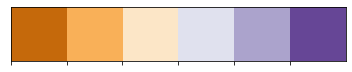

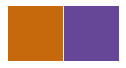

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

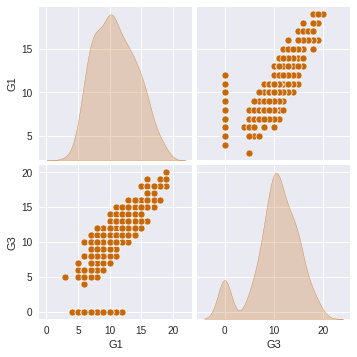

In [ ]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [ ]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [ ]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [ ]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 22ms/step - loss: 17.0564 - mae: 17.0564 - mse: 330.7890 - val_loss: 17.9824 - val_mae: 17.9824 - val_mse: 365.5758
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 16.9383 - mae: 16.9383 - mse: 326.3646 - val_loss: 17.8583 - val_mae: 17.8583 - val_mse: 360.7154
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 16.8215 - mae: 16.8215 - mse: 322.0897 - val_loss: 17.7337 - val_mae: 17.7337 - val_mse: 355.8689
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 16.7041 - mae: 16.7041 - mse: 317.7835 - val_loss: 17.6091 - val_mae: 17.6091 - val_mse: 351.0565
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 16.5859 - mae: 16.5859 - mse: 313.4799 - val_loss: 17.4849 - val_mae: 17.4849 - val_mse: 346.2938
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 16.4687 - mae: 16.4687 - mse: 309.2337 - val_loss: 17.3603 - val_mae: 1

In [ ]:
print(history)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


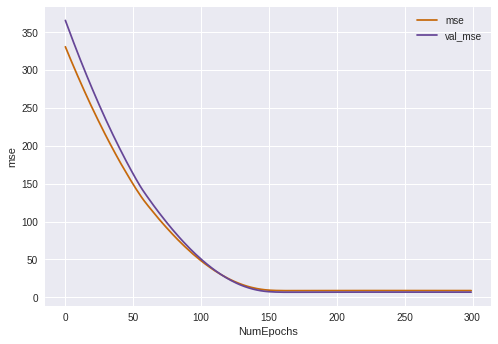

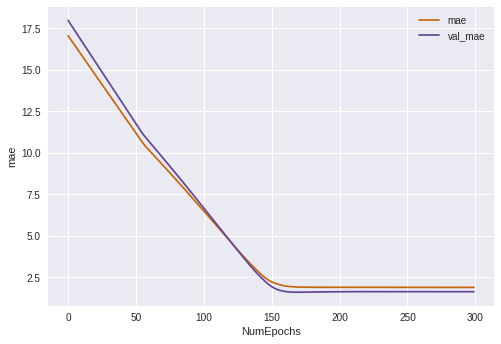

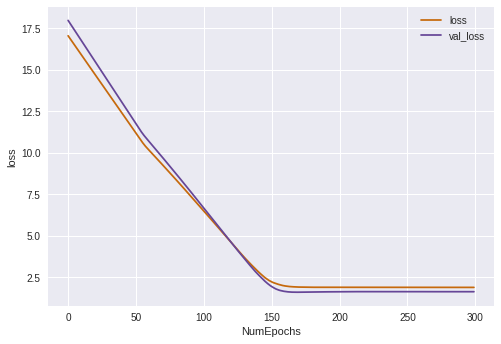

In [ ]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])

array([[2.2384841]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.2384841]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.2384841]
 [3.1256838]
 [4.0128837]
 [4.9000835]
 [5.787283 ]]

List of Predictions (flattened out):
[2.2384841 3.1256838 4.0128837 4.9000835 5.787283 ]



In [ ]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [ ]:
print(len(testPreds))
print(testPreds)

79
[13.772079  6.674483 11.110481 16.43368  16.43368  11.997681 13.772079
 18.208078 18.208078  8.448882 13.772079 12.88488   8.448882  7.561682
  9.336082 12.88488  11.110481 15.54648   7.561682 10.223282 14.659281
 12.88488  13.772079 15.54648   7.561682  7.561682  8.448882 10.223282
 11.997681 10.223282 11.997681 12.88488  10.223282  6.674483  9.336082
 11.997681  7.561682  8.448882 13.772079  9.336082  9.336082  7.561682
 11.997681  6.674483 12.88488   7.561682  7.561682 11.110481 12.88488
 16.43368  11.997681 14.659281  9.336082 11.997681 14.659281 11.997681
 14.659281 11.997681 14.659281 11.110481 11.997681  8.448882 15.54648
  7.561682 15.54648  11.110481 15.54648  12.88488   8.448882  8.448882
 11.997681 17.320879 12.88488  15.54648  10.223282  7.561682 10.223282
  7.561682 11.110481]


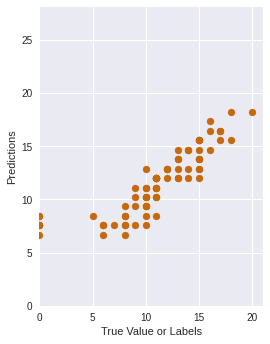

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

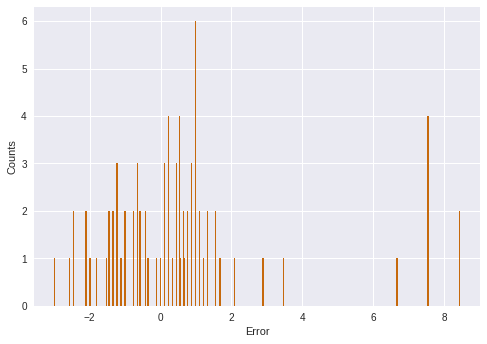

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)